# 1. Introdução

A Amazon Web Services (AWS) é a plataforma de nuvem mais adotada e mais abrangente do mundo, oferecendo mais de 200 serviços completos de datacenters em todo o mundo. Milhões de clientes, incluindo as startups de crescimento mais rápido, grandes empresas e os maiores órgãos governamentais, estão usando a AWS para reduzirem seus custos, ficarem mais ágeis e inovarem mais rapidamente.

O ambiente AWS permite o processamento e análise de dados direto na nuvem, que implica principalmente em uma redução significativa de tempo de processamento e reduação de espaço fisícos para armazenamento de dados.

Este script tem como objetivo uma análise preditiva com clusterização no KMeans e utilizando PCA em relação a um dataset de utilização do cartão de crédito.

# 2. Carga dos Dados e Análise Exploratória

## 2.1 - Carga de Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import io

In [2]:
# Carga da base de dados
base_credit = pd.read_csv('credit_card_clients.csv', header = 1)
base_credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# Resumo do dataset
# Não há valores nulos no dataset
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
# Resumo estatístico dos dados
base_credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


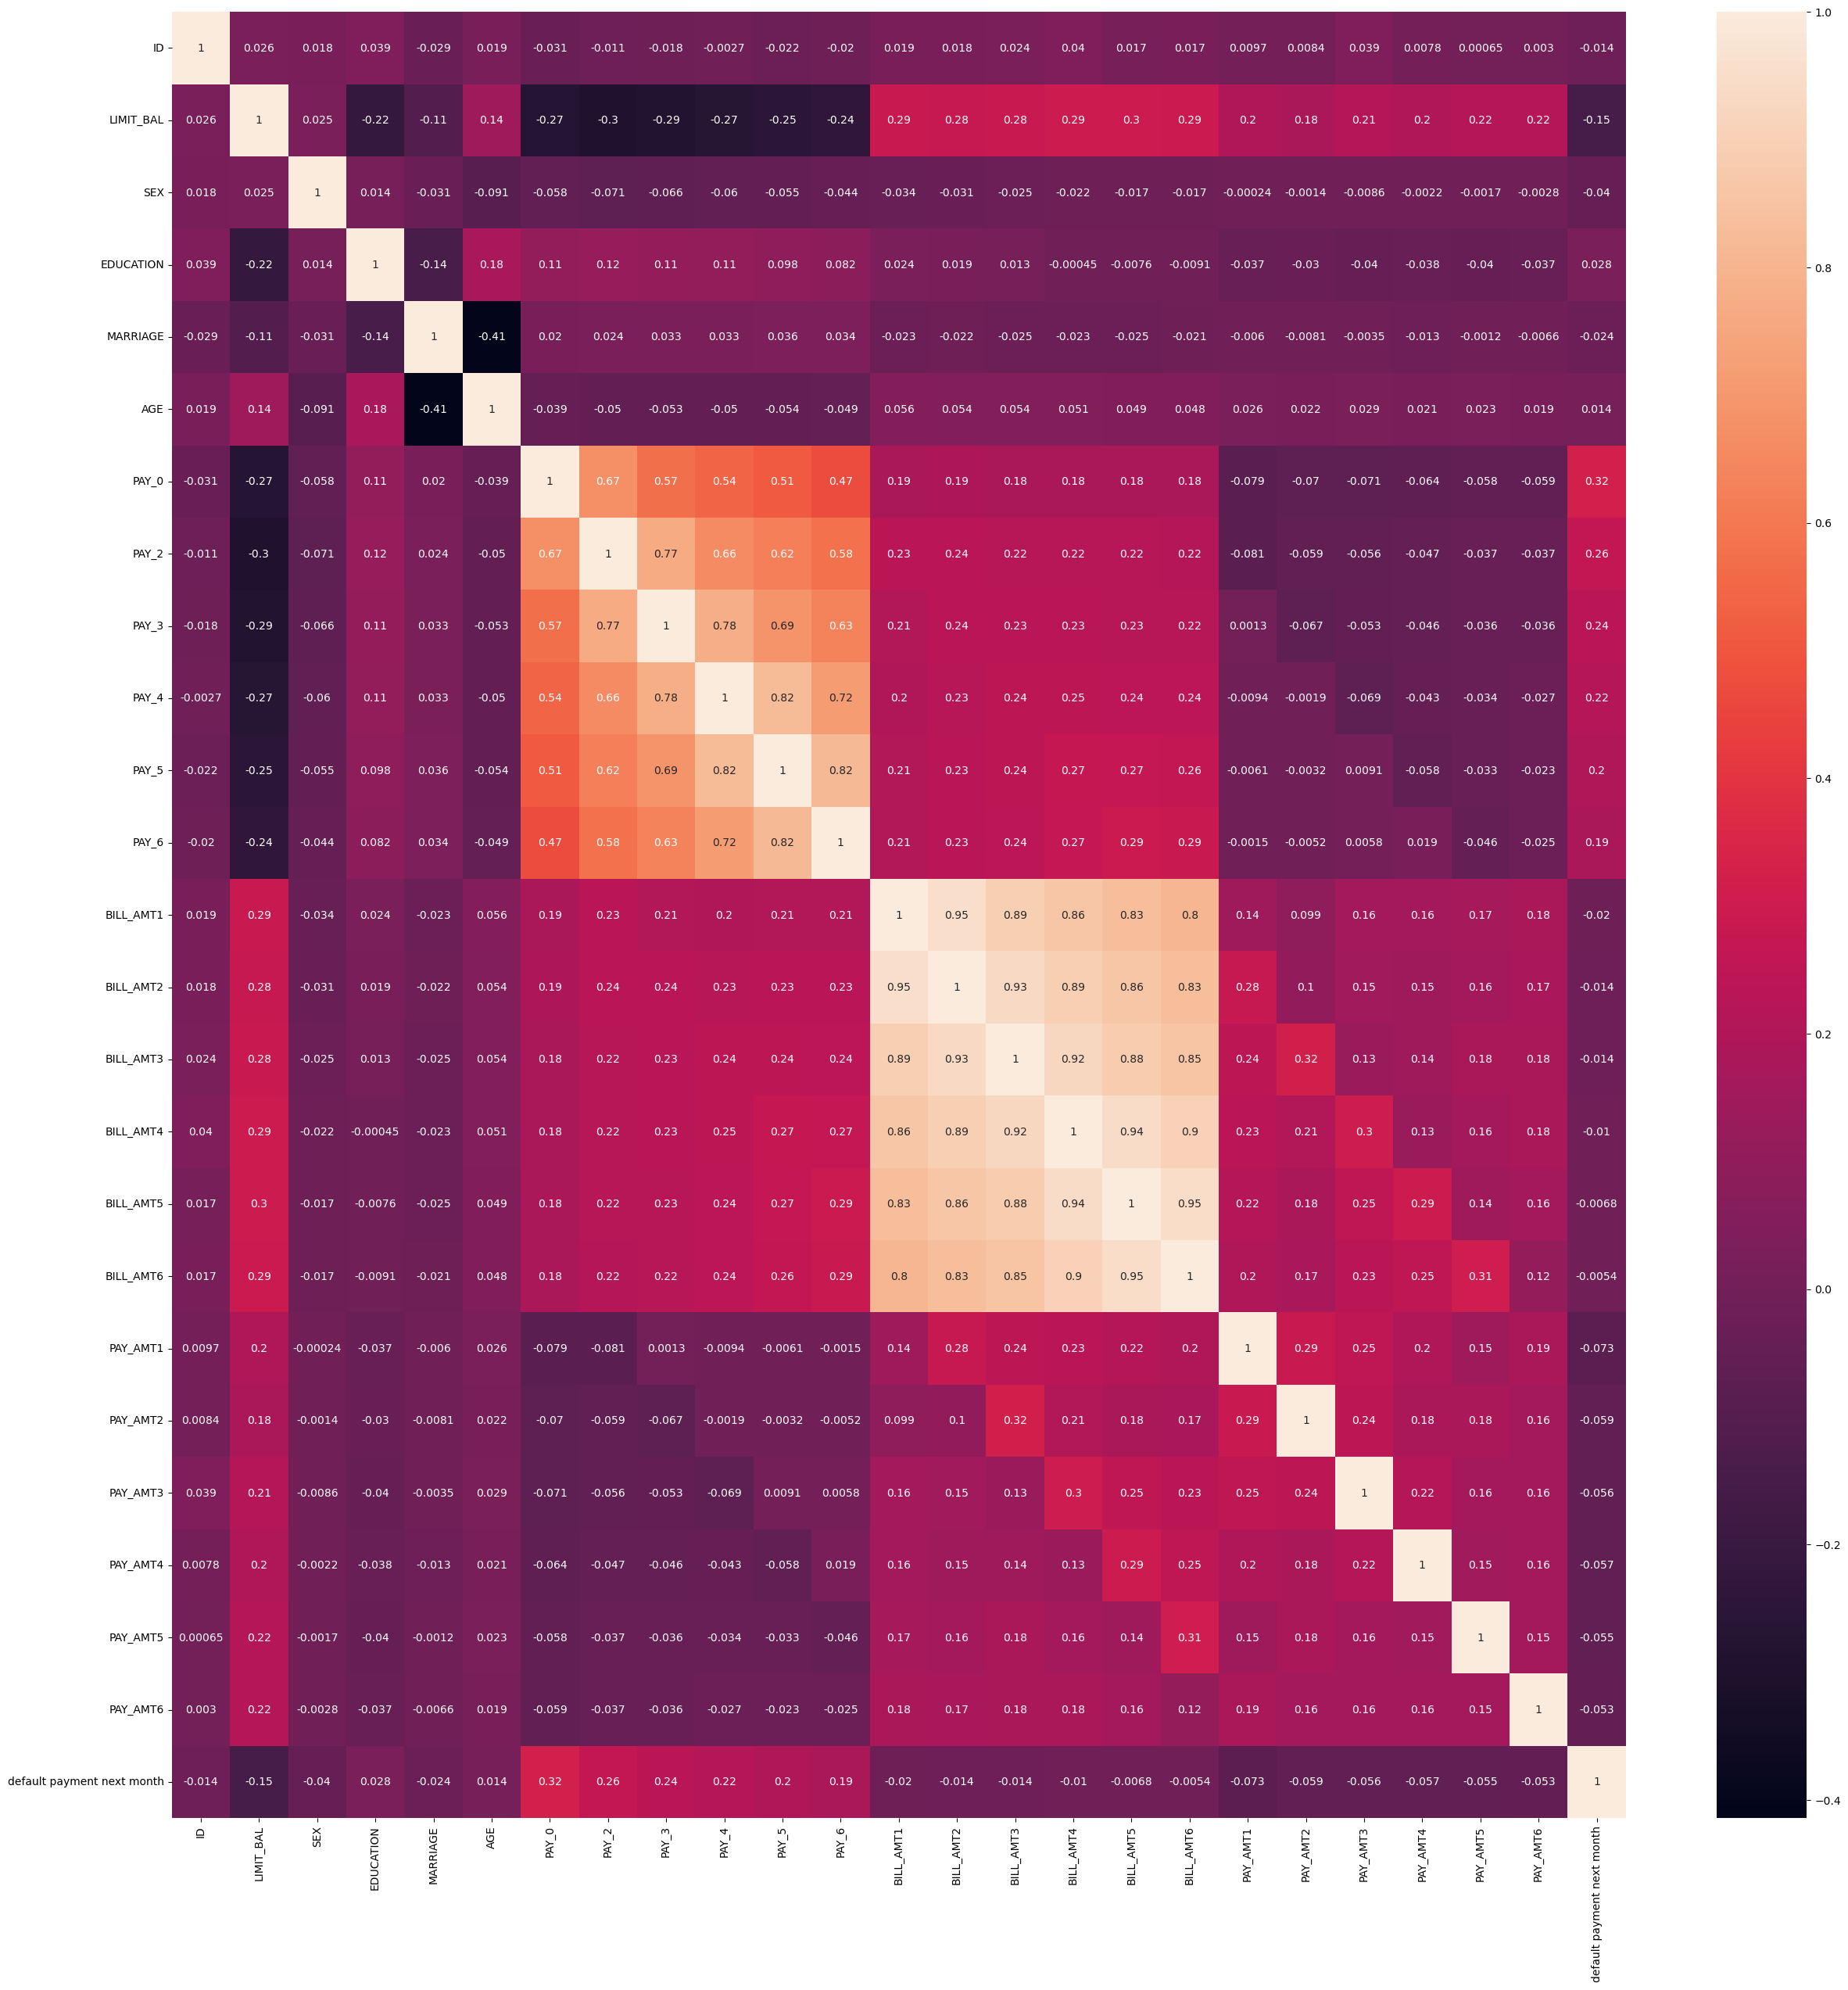

In [6]:
figura = plt.figure(figsize=(30,30))
sns.heatmap(base_credit.corr(), annot=True);

# 3. Processamento dos dados

In [7]:
# Divisão da base de treino do modelo
X = base_credit.iloc[:, 1:len(base_credit.columns)].values
X

array([[ 20000,      2,      2, ...,      0,      0,      1],
       [120000,      2,      2, ...,      0,   2000,      1],
       [ 90000,      2,      2, ...,   1000,   5000,      0],
       ...,
       [ 30000,      1,      2, ...,   2000,   3100,      1],
       [ 80000,      1,      3, ...,  52964,   1804,      1],
       [ 50000,      1,      2, ...,   1000,   1000,      1]])

In [8]:
# Shape dos dados
X.shape

(30000, 24)

In [9]:
# Converta dados para float32
X = np.array(X).astype('float32')
X[0]

array([ 2.000e+04,  2.000e+00,  2.000e+00,  1.000e+00,  2.400e+01,
        2.000e+00,  2.000e+00, -1.000e+00, -1.000e+00, -2.000e+00,
       -2.000e+00,  3.913e+03,  3.102e+03,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00], dtype=float32)

# 4. Configuração do SageMaker

Capítulo onde é feita toda a configuração do SageMaker no ambiente AWS. Toda a configuração foi comentada devido problemas para rodar o AWS devido as cobranças com cartão de crédito.

In [ ]:
# Carga para iniciar o SageMaker
import sagemaker
import boto3
from sagemaker import Session
import sagemaker.amazon.common as smac

In [ ]:
# Cria sessões e bem como caminhos de pasta para armazenamento dos datasets do modelo
session = sagemaker.Session()
bucket = 'cursoawssagemaker' # Envia o dataset binário para o bucket do S3
subpasta_modelo = 'modelos/credit-card/pca' # Pasta para armazenar o modelo do SageMaker
subpasta_dataset = 'datasets/credit-card'  # Pasta para armazenar a base de dados
key_train = 'credit-card-train-data-pca' # base de dados de treinamento
role = sagemaker.get_execution_role() # Identifica as permissões do SageMaker que foi feita quando criado o usuário
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, key_train) # Pasta para a base de trainamento do modelo
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo) # Pasta para a base de trainamento do modelo

# Visualização das variáveis
print('Role: ', role)
print('Localização da base de dados de treinamento: ', s3_train_data)
print('Modelo final será salvo em: ', output_location)

In [ ]:
#Cria a base de dados no formato de bytes
buffer = io.BytesIO()  

# Função para converter do Numpy para Dense Tensor que é utilizado no AWS
smac.write_numpy_to_dense_tensor(buffer, X) 

# Coloca a base na posição inicial da base porque o buffer incremente em 1
buffer.seek(0) 

In [ ]:
# Upload dos dados para o S3
boto3.resource('s3').Bucket(bucket).Object(os.path.join(subpasta_dataset, 'train', key_train)).upload_fileobj(buffer)

# 5. Treinamento PCA

In [ ]:
# Criar container do AWS que importa o PCA
container = sagemaker.image_uris.retrieve(framework = 'pca', region = boto3.Session().region_name)

In [ ]:
# Criar configurações para o PCA
pca = sagemaker.estimator.Estimator(image_uri = container, # importa o algoritmo
                                    role = role, #Permissões do SageMaker
                                    instance_count = 1, # número de instâncias EC2
                                    instance_type = 'ml.c4.xlarge', # tipo de instância EC2
                                    output_path = output_location, # onde o modelo será salvo
                                    sagemaker_session = session) #sessão do sagemaker

In [ ]:
# Configuração dos hiperparametros
pca.set_hyperparameters(feature_dim = 30000, # Parametro obrigatorio para indicar o número de colunas na base de dados
                        num_components = 2, # Número de componentes do PCA
                        mini_batch_size = 200)

In [ ]:
# Fit do PCA
pca.fit({'train': s3_train_data})

# 6. Redução de Dimensionalidade

In [ ]:
# Deploy do PCA no AWS
pca_predictor = pca.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

In [ ]:
# Carga de pacotes para acesso a redução de dimensionalidade do PCA
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer


pca_predictor.serializer = CSVSerializer() #Formato de dados que o modelo recebe como parâmetro
pca_predictor.deserializer = JSONDeserializer() #Formato de saída do modelo

In [ ]:
# Valores com o PCA, redução de 24 dimensões para 2 dimensões
X_pca = pca_predictor.predict(X)
X_pca

In [ ]:
# Extrai os valores do PCA e coloca em um numpy array
X_pca = np.array([r['projection'] for r in X_pca['projections']])

In [ ]:
# Verifica os valores e o shape dos dados
X_pca, X_pca.shape

In [ ]:
# Transforma os dados em tipo float32
X_pca = np.array(X_pca).astype('float32')

# 7. Treinamento KMeans

In [ ]:
subpasta_modelo_kmeans = 'modelos/credit-card/kmeans' # Pasta para armazenar o modelo do SageMaker
output_location_kmeans = 's3://{}/{}'.format(bucket, subpasta_modelo_kmeans) # Pasta para a base de trainamento do modelo

# Visualização das variáveis
print('Modelo kmeans será salvo em: ', output_location_kmeans)

In [ ]:
# Importa o modelo KMeans
from sagemaker import KMeans

In [ ]:
# Cria modelo do KMeans
kmeans = KMeans(role = role, # Permissões SageMaker
                instance_count = 1, # Número de instância do SageMaker
                instance_type = 'ml.c4.xlarge', # Instância do SageMaker
                output_path = output_location_kmeans, # Saíde do modelo
                k = 4) # Número de clusters que devem ser encontrados

In [ ]:
# Fit do modelo
kmeans.fit(kmeans.record_set(X_pca))

# 8. Clusterização com KMeans

In [ ]:
# Previsão do modelo
kmeans_predictor = kmeans.deploy(initial_instance_count = 1, instance_type = 'ml.c4.xlarge')

In [ ]:
# Resultados do modelo
resultados = kmeans_predictor.predict(X_pca)
resultados

In [ ]:
# Grava os clusters em uma variável
rotulos = [r.label['closest_cluster'].float32_tensor.values[0] for r in resultados]
print(rotulos[0:10])

In [ ]:
# Visualiza valores únicos dos clusters
np.unique(rotulos, return_counts = True)

In [ ]:
# Shape da base e total de rótulos
base_credit.shape, len(rotulos)

In [ ]:
# Adiciona os rótulos dos clusters na base de dados
base_credit['cluster'] = rotulos

In [ ]:
# Visualiza a base de dados
base_credit

In [ ]:
# Visuzalia os clusters
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'LIMIT_BAL', y = 'BILL_AMT5', data = base_credit, hue = 'cluster', palette = ['red', 'green', 'blue', 'orange']);

In [ ]:
# Base apenas com o cluster 3 na base de dados
base_credit_3 = base_credit[base_credit['cluster'] == 3.0]
base_credit_3

# 9. Links úteis

In [ ]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/ecr-sa-east-1.html
# https://docs.aws.amazon.com/sagemaker/latest/dg/PCA-reference.html
# https://docs.aws.amazon.com/sagemaker/latest/dg/k-means.html
# https://docs.aws.amazon.com/sagemaker/latest/dg/k-means-api-config.html